<a href="https://colab.research.google.com/github/Soumya169/Tsunami_ML_Project/blob/main/Tsunami.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import kagglehub
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Download latest version
path = kagglehub.dataset_download("ahmeduzaki/global-earthquake-tsunami-risk-assessment-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'global-earthquake-tsunami-risk-assessment-dataset' dataset.
Path to dataset files: /kaggle/input/global-earthquake-tsunami-risk-assessment-dataset


In [ ]:
data = pd.read_csv('/kaggle/input/global-earthquake-tsunami-risk-assessment-dataset/earthquake_data_tsunami.csv')
data.head()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
0,7.0,8,7,768,117,0.509,17.0,14.000,-9.7963,159.596,2022,11,1
1,6.9,4,4,735,99,2.229,34.0,25.000,-4.9559,100.738,2022,11,0
2,7.0,3,3,755,147,3.125,18.0,579.000,-20.0508,-178.346,2022,11,1
3,7.3,5,5,833,149,1.865,21.0,37.000,-19.2918,-172.129,2022,11,1
4,6.6,0,2,670,131,4.998,27.0,624.464,-25.5948,178.278,2022,11,1


In [ ]:
print(data.info())
print(data.shape)
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  782 non-null    float64
 1   cdi        782 non-null    int64  
 2   mmi        782 non-null    int64  
 3   sig        782 non-null    int64  
 4   nst        782 non-null    int64  
 5   dmin       782 non-null    float64
 6   gap        782 non-null    float64
 7   depth      782 non-null    float64
 8   latitude   782 non-null    float64
 9   longitude  782 non-null    float64
 10  Year       782 non-null    int64  
 11  Month      782 non-null    int64  
 12  tsunami    782 non-null    int64  
dtypes: float64(6), int64(7)
memory usage: 79.6 KB
None
(782, 13)
        magnitude         cdi         mmi          sig         nst  \
count  782.000000  782.000000  782.000000   782.000000  782.000000   
mean     6.941125    4.333760    5.964194   870.108696  230.250639   
std      0.445514  

In [ ]:
print(data.isnull().sum())
print(data.duplicated().sum())

magnitude    0
cdi          0
mmi          0
sig          0
nst          0
dmin         0
gap          0
depth        0
latitude     0
longitude    0
Year         0
Month        0
tsunami      0
dtype: int64
0


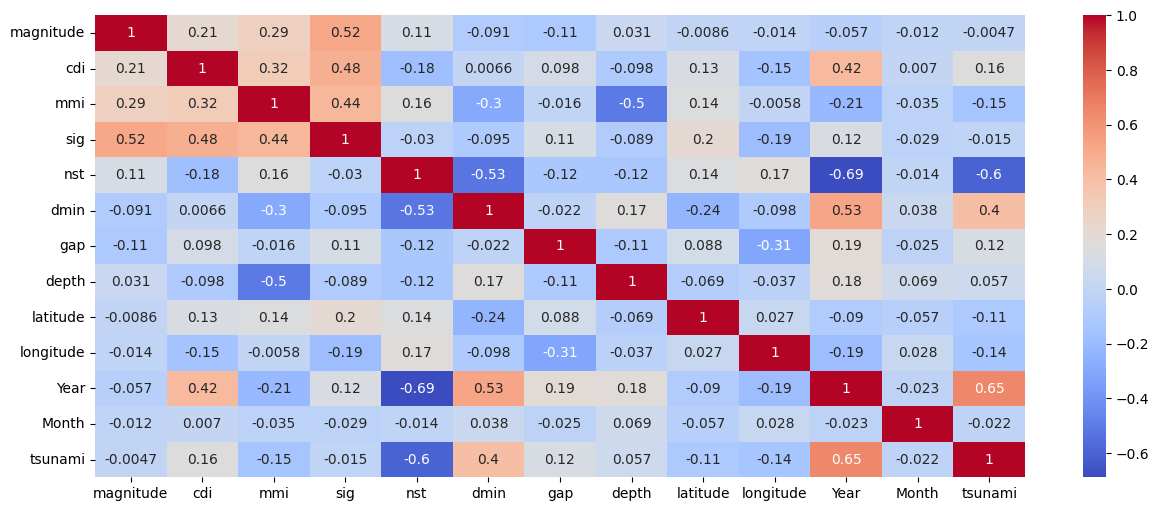

In [ ]:
corr=data.corr()
plt.figure(figsize=(15,6))
sns.heatmap(data=corr , annot=True , cmap='coolwarm')
plt.show()

In [ ]:
print(data.columns)

Index(['magnitude', 'cdi', 'mmi', 'sig', 'nst', 'dmin', 'gap', 'depth',
       'latitude', 'longitude', 'Year', 'Month', 'tsunami'],
      dtype='object')


In [ ]:
data[['magnitude' , 'depth' , 'sig' , 'latitude' , 'longitude']].describe()

,magnitude,depth,sig,latitude,longitude
count,782.000000,782.000000,782.000000,782.000000,782.000000
mean,6.941125,75.883199,870.108696,3.538100,52.609199
std,0.445514,137.277078,322.465367,27.303429,117.898886
min,6.500000,2.700000,650.000000,-61.848400,-179.968000
25%,6.600000,14.000000,691.000000,-14.595600,-71.668050
50%,6.800000,26.295000,754.000000,-2.572500,109.426000
75%,7.100000,49.750000,909.750000,24.654500,148.941000
max,9.100000,670.810000,2910.000000,71.631200,179.662000


Text(0, 0.5, 'Count')

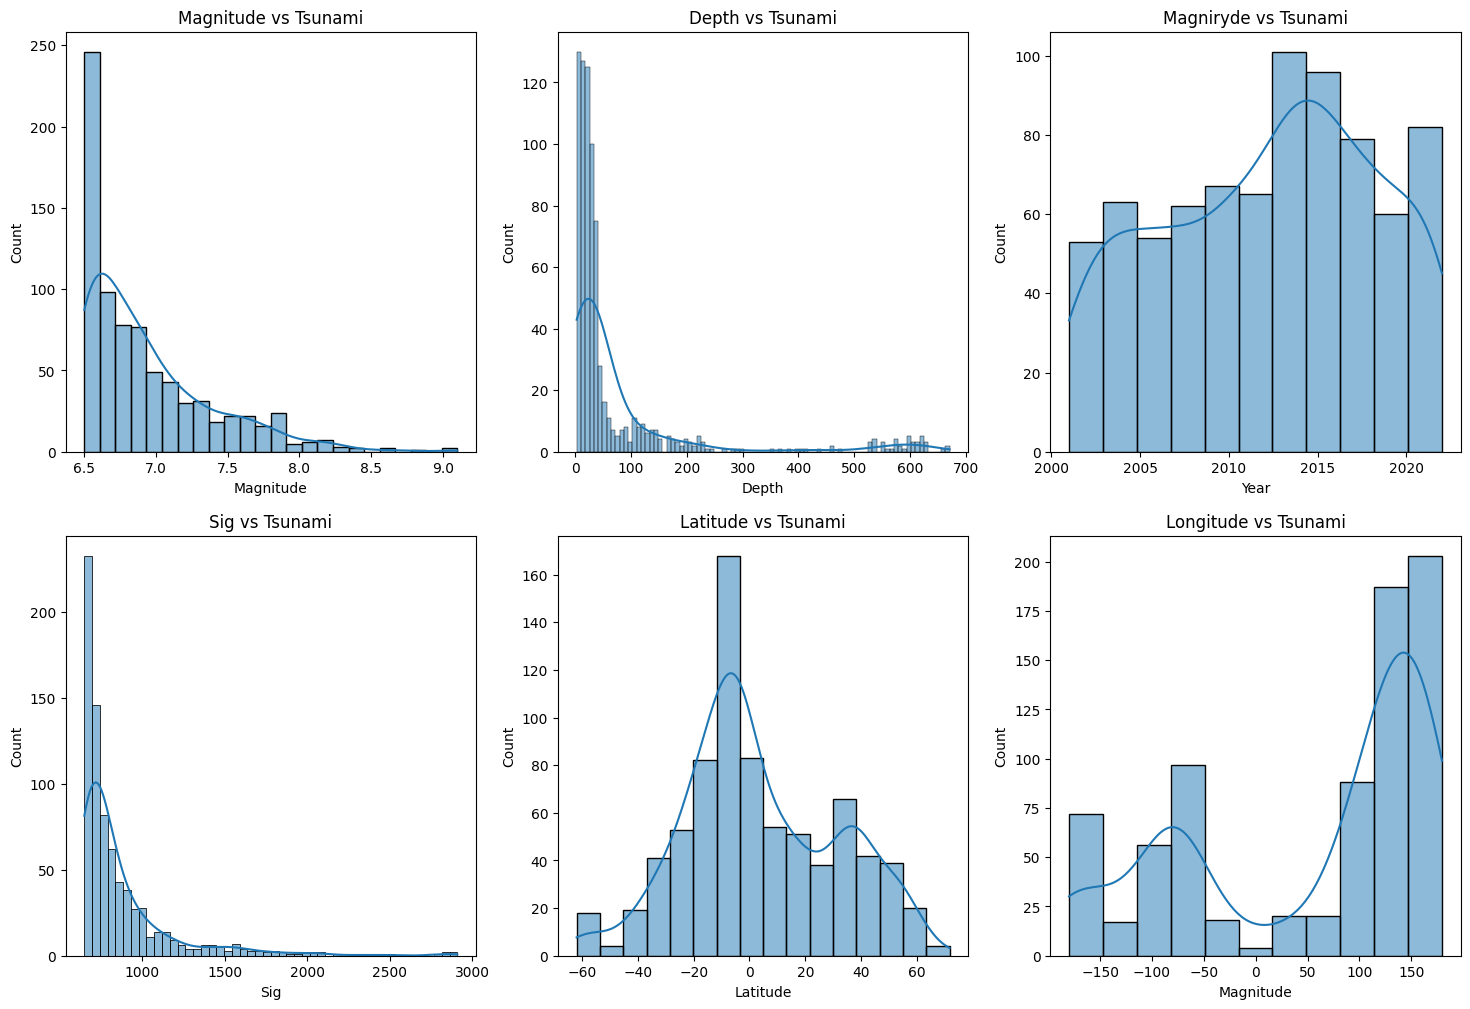

In [ ]:
fig,axes=plt.subplots(2,3,figsize= (18,12))
sns.histplot(data = data['magnitude'] , ax=axes[0,0] ,kde=True )
axes[0,0].set_title ('Magnitude vs Tsunami')
axes[0,0].set_xlabel('Magnitude')
axes[0,0].set_ylabel('Count')

sns.histplot(data = data['depth'] , ax=axes[0,1] ,kde=True )
axes[0,1].set_title ('Depth vs Tsunami')
axes[0,1].set_xlabel('Depth')
axes[0,1].set_ylabel('Count')

sns.histplot(data = data['Year'] , ax=axes[0,2] ,kde=True )
axes[0,2].set_title ('Magniryde vs Tsunami')
axes[0,2].set_xlabel('Year')
axes[0,2].set_ylabel('Count')

sns.histplot(data = data['sig'] , ax=axes[1,0] ,kde=True )
axes[1,0].set_title ('Sig vs Tsunami')
axes[1,0].set_xlabel('Sig')
axes[1,0].set_ylabel('Count')

sns.histplot(data = data['latitude'] , ax=axes[1,1] ,kde=True )
axes[1,1].set_title ('Latitude vs Tsunami')
axes[1,1].set_xlabel('Latitude')
axes[1,1].set_ylabel('Count')

sns.histplot(data = data['longitude'] , ax=axes[1,2] ,kde=True )
axes[1,2].set_title ('Longitude vs Tsunami')
axes[1,2].set_xlabel('Magnitude')
axes[1,2].set_ylabel('Count')

Text(0.5, 1.0, 'Latitude vs Tsunami')

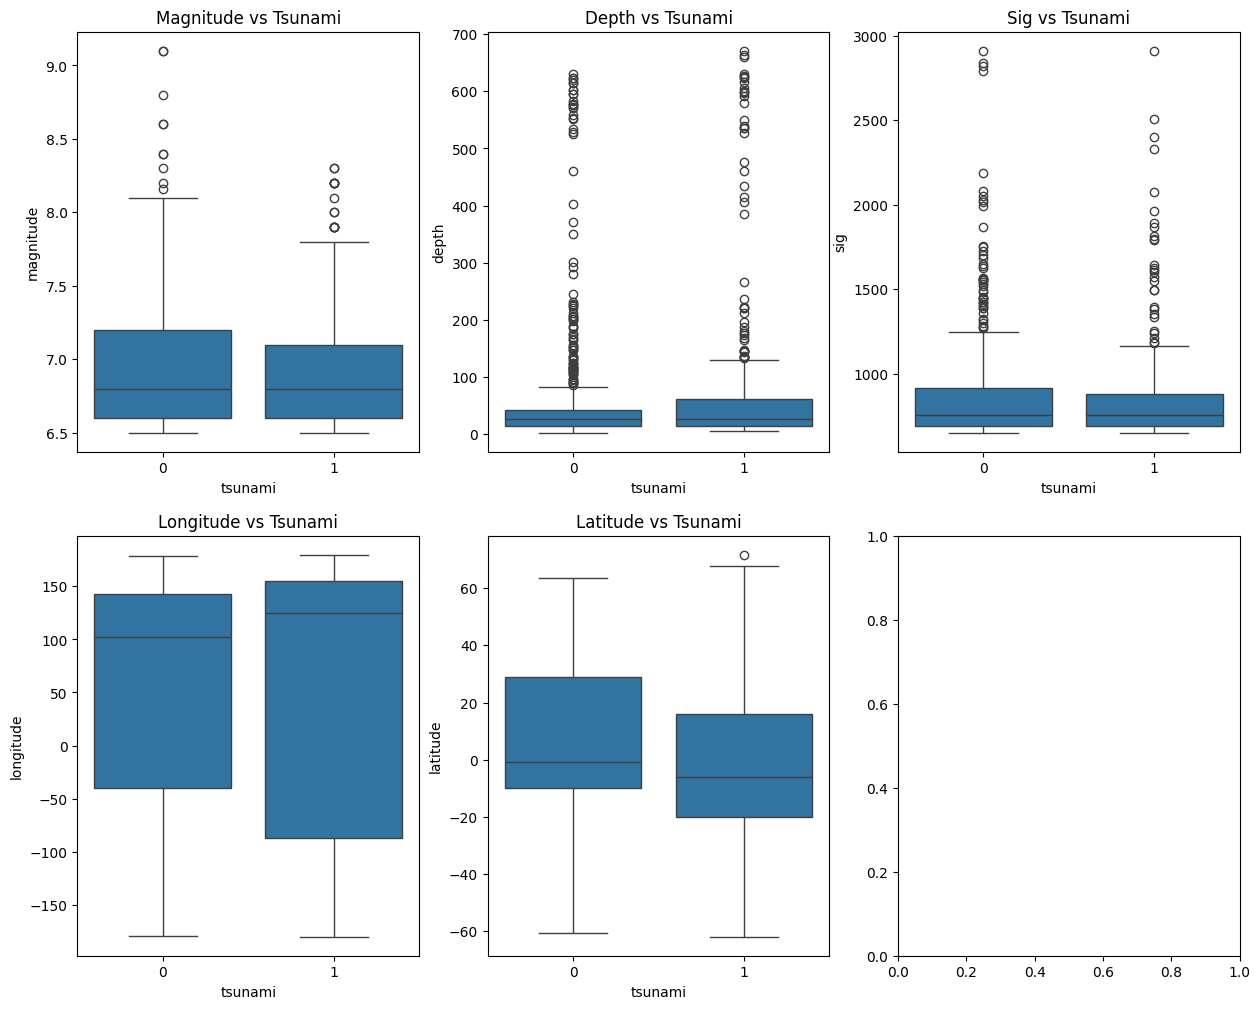

In [ ]:
fig, axes = plt.subplots(2, 3, figsize = (15, 12))
sns.boxplot( x = 'tsunami', y = 'magnitude', ax = axes[0, 0,] , data = data)
axes[0, 0].set_title( 'Magnitude vs Tsunami')

sns.boxplot( x = 'tsunami', y = 'depth', ax = axes[0, 1,] , data = data)
axes[0, 1].set_title( 'Depth vs Tsunami')

sns.boxplot( x = 'tsunami', y = 'sig', ax = axes[0, 2,] , data = data)
axes[0, 2].set_title( 'Sig vs Tsunami')

sns.boxplot( x = 'tsunami', y = 'longitude', ax = axes[1, 0,] , data = data)
axes[1, 0].set_title( 'Longitude vs Tsunami')

sns.boxplot( x = 'tsunami', y = 'latitude', ax = axes[1, 1,] , data = data)
axes[1, 1].set_title( 'Latitude vs Tsunami')

In [ ]:
data['tsunami'].value_counts()

,count
tsunami,
0,478
1,304


In [ ]:
data.columns

Index(['magnitude', 'cdi', 'mmi', 'sig', 'nst', 'dmin', 'gap', 'depth',
       'latitude', 'longitude', 'Year', 'Month', 'tsunami'],
      dtype='object')

In [ ]:
data['tsunami'].value_counts()

,count
tsunami,
0,478
1,304


Text(0.5, 1.0, 'Magnitude vs Depth Sctter Plot by Tsunami')

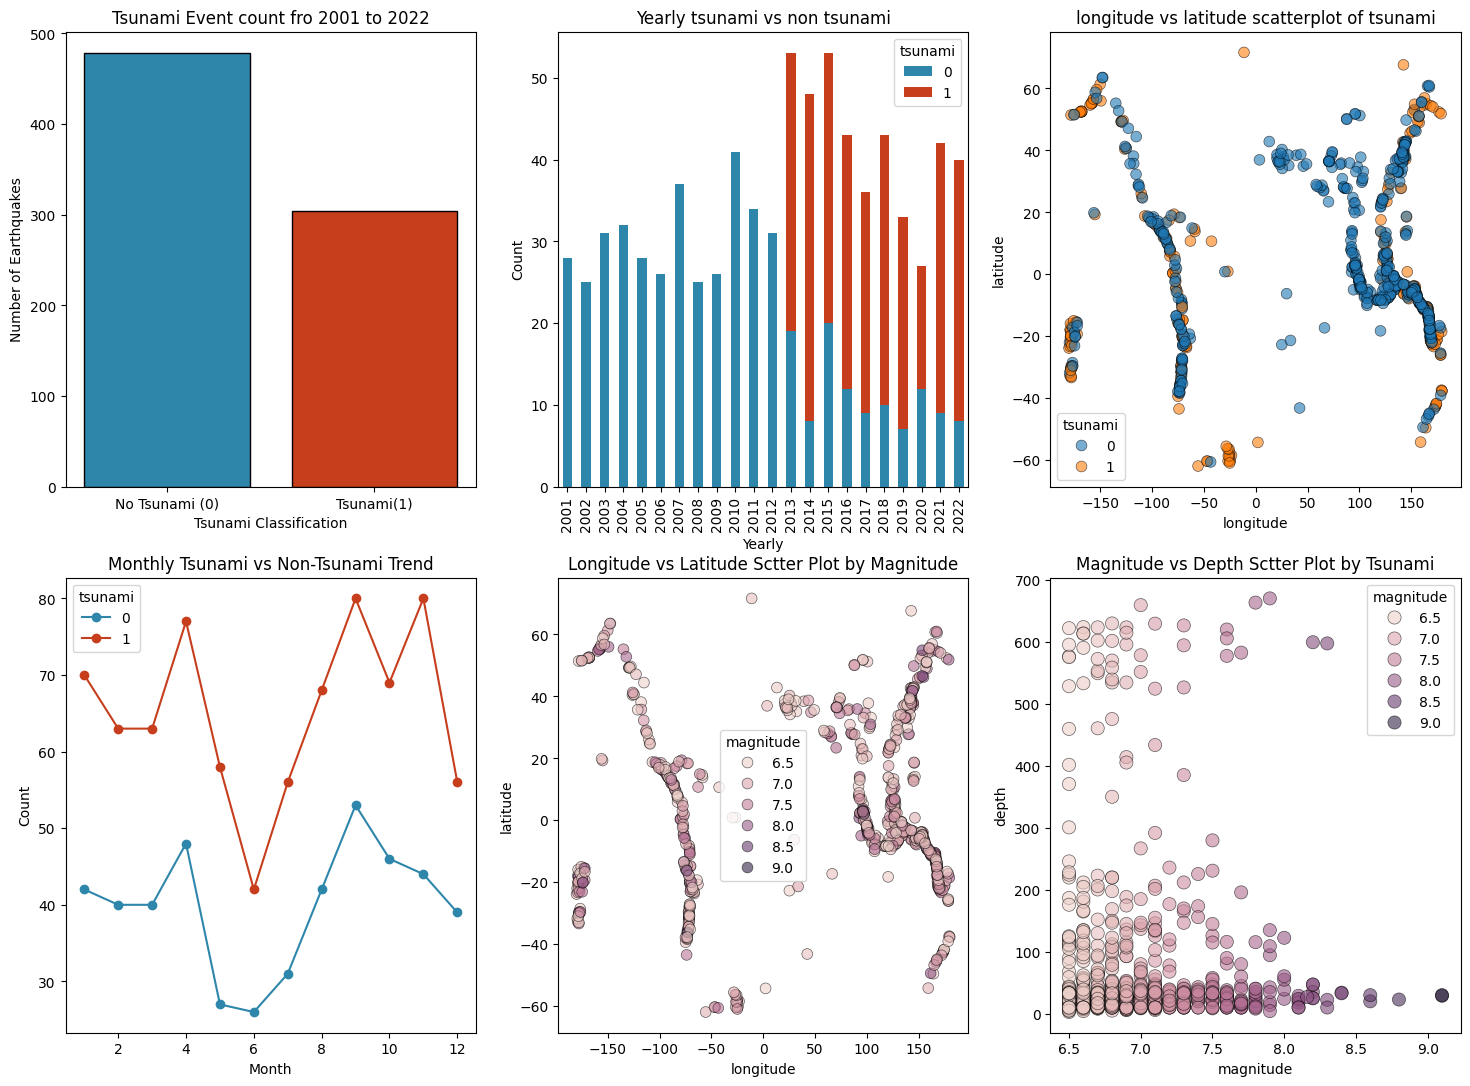

In [ ]:
counts = data['tsunami'].value_counts()
fig , axes = plt.subplots(2,3,figsize =(18,13))

axes[0,0].bar(['No Tsunami (0)' ,'Tsunami(1)'] , counts  , edgecolor ='black', color=['#2E86AB', '#C73E1D'])
axes[0,0].set_title('Tsunami Event count fro 2001 to 2022')
axes[0,0].set_xlabel('Tsunami Classification')
axes[0,0].set_ylabel('Number of Earthquakes')

yearly_data = data.groupby(['Year' , 'tsunami']).size().unstack(fill_value=0)
yearly_data.plot(kind='bar' , stacked=True ,color=['#2E86AB', '#C73E1D'] ,ax=axes[0,1] )
axes[0,1].set_title('Yearly tsunami vs non tsunami')
axes[0,1].set_xlabel('Yearly')
axes[0,1].set_ylabel('Count')

sns.scatterplot(y='latitude' , x='longitude' ,hue = 'tsunami' , data= data , ax=axes[0,2] , s=60  , alpha =0.6 , edgecolors='black' , linewidth=0.5 )
axes[0,2].set_title('longitude vs latitude scatterplot of tsunami')

monthly_data =data.groupby(['Month' , 'tsunami']).size().unstack(fill_value=0)
monthly_data.plot(kind ='line' , stacked =True , color = ['#2E86AB', '#C73E1D'] , ax=axes[1,0] , marker='o' )
axes[1, 0].set_title('Monthly Tsunami vs Non-Tsunami Trend')
axes[1, 0].set_xlabel('Month')
axes[1, 0].set_ylabel('Count')

sns.scatterplot(y = 'latitude', x = 'longitude', hue ='magnitude', data = data, ax = axes[1, 1]
                , s = 60, alpha=0.6, edgecolors='black', linewidth=0.5)
axes[1,1].set_title('Longitude vs Latitude Sctter Plot by Magnitude')


sns.scatterplot(x = 'magnitude', y = 'depth', hue ='magnitude', data = data, ax = axes[1, 2]
                , s = 90, alpha=0.6, edgecolors='black', linewidth=0.5)
axes[1,2].set_title('Magnitude vs Depth Sctter Plot by Tsunami')


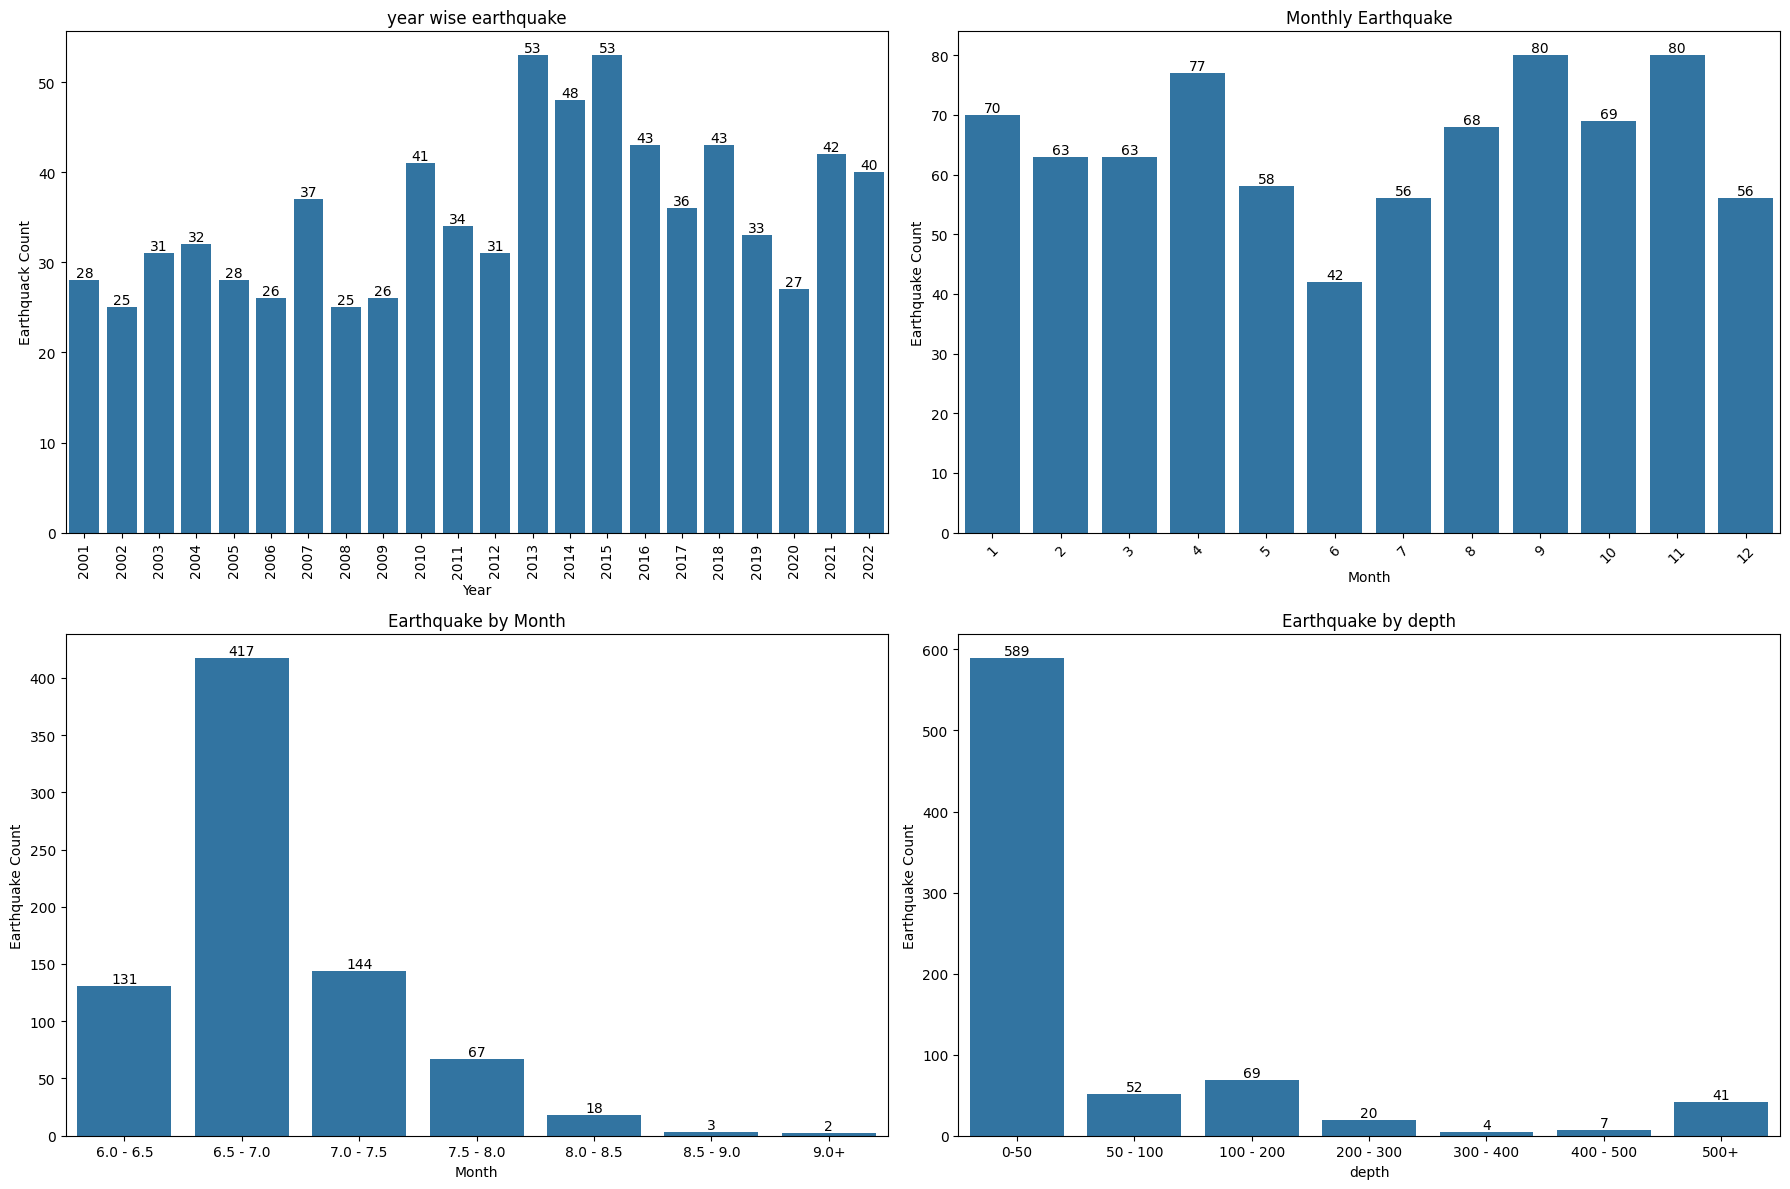

In [ ]:
fig , axes =plt.subplots(2,2,figsize = (18,12))
yearly_count=data['Year'].value_counts().sort_index()
sns.barplot(x=yearly_count.index , y=yearly_count.values , ax=axes[0,0])
axes[0,0].set_title('year wise earthquake')
axes[0,0].set_xlabel('Year')
axes[0,0].set_ylabel('Earthquack Count')
axes[0,0].tick_params(axis='x' , rotation =90)

for i, v in enumerate(yearly_count):
    axes[0,0].text(i, v, str(v), ha='center', va='bottom')

monthly_count=data['Month'].value_counts().sort_index()
sns.barplot(x=monthly_count.index , y=monthly_count.values , ax=axes[0,1])
axes[0,1].set_title('Monthly Earthquake')
axes[0,1].set_xlabel('Month')
axes[0,1].set_ylabel('Earthquake Count')
axes[0,1].tick_params(axis='x', rotation=45)
for j, k in enumerate(monthly_count):
    axes[0, 1].text(j, k, str(k), ha = 'center', va = 'bottom')

magnitude_range = pd.cut(data['magnitude'] , bins=[6.0,6.5,7.0,7.5,8.0,8.5,9.0,9.5] , labels =['6.0 - 6.5' ,'6.5 - 7.0' , '7.0 - 7.5' , '7.5 - 8.0'  , '8.0 - 8.5','8.5 - 9.0' ,'9.0+'])
magnitude_count = magnitude_range.value_counts().sort_index()
sns.barplot(x = magnitude_count.index, y = magnitude_count.values, ax = axes[1, 0] )
axes[1, 0].set_title('Earthquake by Month')
axes[1, 0].set_xlabel('Month')
axes[1, 0].set_ylabel('Earthquake Count')

for i, v in enumerate(magnitude_count):
    axes[1, 0].text( i, v, str(v), ha = 'center', va = 'bottom')


depth_range = pd.cut(data['depth'] , bins=[0 , 50, 100 , 200 , 300 , 400 , 500 , 700] , labels =['0-50' ,'50 - 100' , '100 - 200' , '200 - 300'  , '300 - 400','400 - 500' ,'500+'])
depth_count = depth_range.value_counts().sort_index()
sns.barplot(x = depth_count.index, y = depth_count.values, ax = axes[1, 1] )
axes[1, 1].set_title('Earthquake by depth')
axes[1, 1].set_xlabel('depth')
axes[1, 1].set_ylabel('Earthquake Count')

for i, v in enumerate(depth_count):
    axes[1, 1].text( i, v, str(v), ha = 'center', va = 'bottom')
plt.tight_layout()


**Model Create**

In [ ]:
data_copy=data.copy()
data_copy

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
0,7.0,8,7,768,117,0.509,17.0,14.000,-9.7963,159.596,2022,11,1
1,6.9,4,4,735,99,2.229,34.0,25.000,-4.9559,100.738,2022,11,0
2,7.0,3,3,755,147,3.125,18.0,579.000,-20.0508,-178.346,2022,11,1
3,7.3,5,5,833,149,1.865,21.0,37.000,-19.2918,-172.129,2022,11,1
4,6.6,0,2,670,131,4.998,27.0,624.464,-25.5948,178.278,2022,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,7.7,0,8,912,427,0.000,0.0,60.000,13.0490,-88.660,2001,1,0
778,6.9,5,7,745,0,0.000,0.0,36.400,56.7744,-153.281,2001,1,0
779,7.1,0,7,776,372,0.000,0.0,103.000,-14.9280,167.170,2001,1,0
780,6.8,0,5,711,64,0.000,0.0,33.000,6.6310,126.899,2001,1,0


In [ ]:
data_copy['depth_category'] = pd.cut(data_copy['depth'] , bins =[0,70,300 ,700] , labels = ['Shallow' , 'Intermediate' , 'Deep'])
data_copy['magnitude_catagory'] = pd.cut(data_copy['magnitude'], bins = [0,3,6,10] , labels =['Light' , 'Moderate' , 'Strong'])
data_copy['season'] = data_copy['Month'].apply(
    lambda x: 'Winter' if x in [12, 1, 2] else 'Spring' if x in [3, 4, 5] else'Summer' if x in [6, 7, 8] else 'Fall')
data_copy


,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami,depth_category,magnitude_catagory,season
0,7.0,8,7,768,117,0.509,17.0,14.000,-9.7963,159.596,2022,11,1,Shallow,Strong,Fall
1,6.9,4,4,735,99,2.229,34.0,25.000,-4.9559,100.738,2022,11,0,Shallow,Strong,Fall
2,7.0,3,3,755,147,3.125,18.0,579.000,-20.0508,-178.346,2022,11,1,Deep,Strong,Fall
3,7.3,5,5,833,149,1.865,21.0,37.000,-19.2918,-172.129,2022,11,1,Shallow,Strong,Fall
4,6.6,0,2,670,131,4.998,27.0,624.464,-25.5948,178.278,2022,11,1,Deep,Strong,Fall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,7.7,0,8,912,427,0.000,0.0,60.000,13.0490,-88.660,2001,1,0,Shallow,Strong,Winter
778,6.9,5,7,745,0,0.000,0.0,36.400,56.7744,-153.281,2001,1,0,Shallow,Strong,Winter
779,7.1,0,7,776,372,0.000,0.0,103.000,-14.9280,167.170,2001,1,0,Intermediate,Strong,Winter
780,6.8,0,5,711,64,0.000,0.0,33.000,6.6310,126.899,2001,1,0,Shallow,Strong,Winter


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
standard_scaler = StandardScaler()

In [ ]:
from sklearn.metrics._plot.precision_recall_curve import precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import(classification_report , confusion_matrix ,roc_curve  ,auc , accuracy_score  , precision_score , recall_score  , f1_score , roc_auc_score)

In [ ]:
le =LabelEncoder()
data_copy['depth_category'] = le.fit_transform(data_copy['depth_category'])
data_copy['magnitude_catagory'] = le.fit_transform(data_copy['magnitude_catagory'])
data_copy['season'] = le.fit_transform(data_copy['season'])

In [ ]:
x=data_copy.drop('tsunami', axis = 1)
y=data_copy['tsunami']

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(x , y , train_size=0.80 , random_state = 42 )

In [ ]:
lr=LogisticRegression()
lr.fit(X_train , y_train)


LogisticRegression()

In [ ]:
predict=lr.predict(X_test)
acc=accuracy_score(y_test , predict)
print(acc)
m=confusion_matrix(y_test ,predict)
print(m)
c=classification_report(y_test , predict)
print(c)

0.8089171974522293
[[69 22]
 [ 8 58]]
              precision    recall  f1-score   support

           0       0.90      0.76      0.82        91
           1       0.72      0.88      0.79        66

    accuracy                           0.81       157
   macro avg       0.81      0.82      0.81       157
weighted avg       0.82      0.81      0.81       157



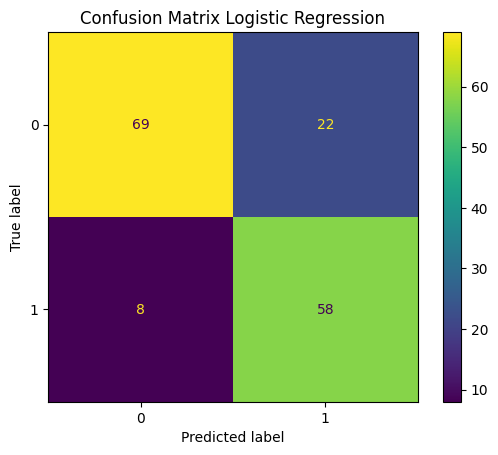

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test)
plt.title("Confusion Matrix Logistic Regression")
plt.show()


In [ ]:
rfc = RandomForestClassifier(n_estimators=100 , random_state=42 , criterion ='gini')
rfc.fit(X_train , y_train)

RandomForestClassifier(random_state=42)

In [ ]:
pred = rfc.predict(X_test)
acc1=accuracy_score(y_test , pred)
print(acc1)
m1=confusion_matrix(y_test ,pred)
print(m1)
c1=classification_report(y_test , pred)
print(c1)

0.9235668789808917
[[81 10]
 [ 2 64]]
              precision    recall  f1-score   support

           0       0.98      0.89      0.93        91
           1       0.86      0.97      0.91        66

    accuracy                           0.92       157
   macro avg       0.92      0.93      0.92       157
weighted avg       0.93      0.92      0.92       157



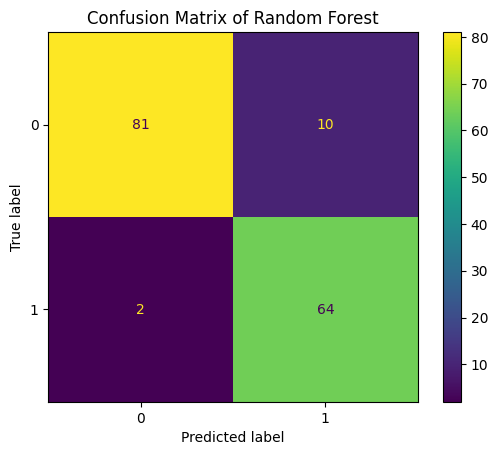

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_estimator(rfc, X_test, y_test)
plt.title("Confusion Matrix of Random Forest")
plt.show()


In [ ]:
gbc = GradientBoostingClassifier(n_estimators=100 , random_state =40)
gbc.fit(X_train , y_train)

GradientBoostingClassifier(random_state=40)

In [ ]:
pred_gb = gbc.predict(X_test)
acc2=accuracy_score(y_test , pred_gb)
print(acc2)
m2=confusion_matrix(y_test ,pred_gb)
print(m2)
c2=classification_report(y_test , pred_gb)
print(c2)

0.9617834394904459
[[85  6]
 [ 0 66]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.97        91
           1       0.92      1.00      0.96        66

    accuracy                           0.96       157
   macro avg       0.96      0.97      0.96       157
weighted avg       0.96      0.96      0.96       157



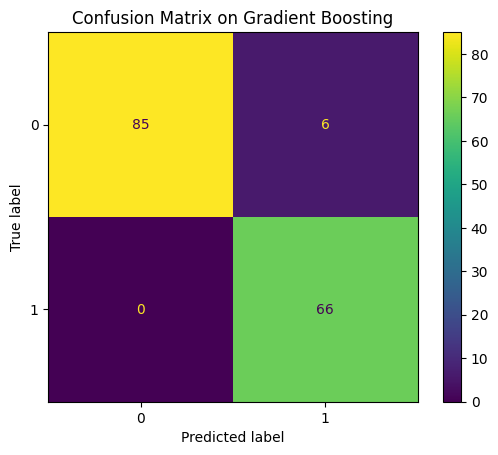

In [ ]:
ConfusionMatrixDisplay.from_estimator(gbc, X_test, y_test)
plt.title("Confusion Matrix on Gradient Boosting")
plt.show()

In [ ]:
dtc = DecisionTreeClassifier(random_state=40)
dtc.fit(X_train , y_train)

DecisionTreeClassifier(random_state=40)

In [ ]:
pred_dtc = dtc.predict(X_test)
dtc_acc=accuracy_score(y_test , pred_dtc)
print(dtc_acc)
dtc_class = classification_report(y_test , pred_dtc)
print(dtc_class)
dtc_conf = confusion_matrix(y_test , pred_dtc)
print(dtc_conf)

0.9299363057324841
              precision    recall  f1-score   support

           0       0.92      0.97      0.94        91
           1       0.95      0.88      0.91        66

    accuracy                           0.93       157
   macro avg       0.93      0.92      0.93       157
weighted avg       0.93      0.93      0.93       157

[[88  3]
 [ 8 58]]


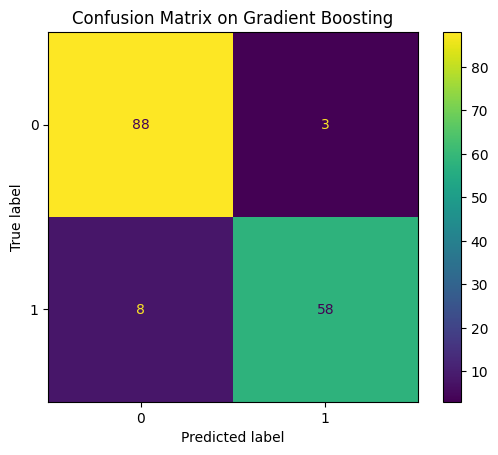

In [ ]:
ConfusionMatrixDisplay.from_estimator(dtc, X_test, y_test)
plt.title("Confusion Matrix on Gradient Boosting")
plt.show()